# Covid-19 Visualization by Fery


**References**:
- https://medium.com/datasekitar/visualisasi-kasus-aktif-covid-19-indonesia-de8e236430f0
- https://menujuherdimmunity.id/

**Data source**: kawalcovid19.id

---

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

### Load Datasets
Datasets acquired publicly from **https://docs.google.com/spreadsheets/d/1ma1T9hWbec1pXlwZ89WakRk-OfVUQZsOCFl4FwZxzVw**

In [2]:
KEY = '1ma1T9hWbec1pXlwZ89WakRk-OfVUQZsOCFl4FwZxzVw' # spreadsheet key
GID = ['2052139453', '387345074'] # sheet that will be used
timeline_url = f'https://docs.google.com/spreadsheets/d/{KEY}/export?format=csv&gid={GID[0]}'
sh_url = f'https://docs.google.com/spreadsheets/d/{KEY}/export?format=csv&gid={GID[1]}'
tl = pd.read_csv(timeline_url)
tl = tl.iloc[:,:36]
stats = pd.read_csv(sh_url)
vaccinated = stats.loc[:,'Dosis pertama':'Dosis kedua (harian)']
stats = stats.loc[:,:'Case Growth Rate'].drop(columns=[
    'Kasus Impor', 'Kasus Lokal', 'PDP', 'ODP', 'Positif \n(=C)', 'Jumlah test/juta penduduk',])

### Data Preparation

In [3]:
tl.head(3)

,Total Kasus,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,...,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?
0,18-Mar,0,1,17,0,0,3,158,0,24,...,1,1,0,0,0,0,0,0,0,0
1,19-Mar,0,1,27,0,0,5,210,0,26,...,1,2,0,0,0,0,0,0,0,0
2,20-Mar,0,4,37,0,0,4,215,0,41,...,1,1,0,0,0,0,0,0,0,13


In [4]:
stats.head(3)

,Unnamed: 0,Kasus harian,Total kasus,Kasus aktif,% kasus aktif,Sembuh\n(baru),Sembuh,Tingkat kesembuhan (seluruh kasus),Tingkat kesembuhan (closed cases),Meninggal\n(baru),...,Dalam Proses,Spesimen,Orang yang dites,Vaksinasi (ineligible),Test/Positif,Jumlah org yg dites / positif,Jumlah Test/Positif harian,Positif / Jumlah Tes,Positive rate harian,Case Growth Rate
0,2-Mar,2,2,2,100.00%,0,0,0.00%,0,0,...,2.0,NaN,NaN,NaN,169.5,169.5,0.00,0.59%,NaN,NaN
1,3-Mar,0,2,2,100.00%,0,0,0.00%,NaN,0,...,2.0,NaN,2,NaN,170.5,170.5,#DIV/0!,0.59%,0.00%,0.00%
2,4-Mar,0,2,2,100.00%,0,0,0.00%,NaN,0,...,14.0,NaN,31,NaN,186.0,186.0,#DIV/0!,0.54%,0.00%,0.00%


In [5]:
vaccinated.tail(3)

,Dosis pertama,Dosis kedua,Dosis pertama (harian),Dosis kedua (harian)
362,"1,691,724","998,439","75,559","16,069"
363,"1,720,523","1,002,218","28,799","3,779"
364,"1,776,336","1,062,173","55,813","59,955"


#### Data per provinsi (Timeline dataframe)

In [6]:
tl[tl['Aceh'] == 'Aceh']['Total Kasus'] # shown 7 different tables that will be seperated (including the header)

351               Kasus Harian
706                Kasus Aktif
1055                    Sembuh
1404             Sembuh Harian
1753           Meninggal Dunia
2105    Meninggal Dunia Harian
Name: Total Kasus, dtype: object

In [7]:
diff_table = tl[tl['Aceh'] == 'Aceh'].index # index of different table
print(diff_table)

Int64Index([351, 706, 1055, 1404, 1753, 2105], dtype='int64')


In [8]:
exclude = tl[tl['Aceh'] == 'Jakarta'].index
exclude[0] # index of table that will be excluded

2456

In [9]:
# seperate the tables
total_kasus = tl.iloc[:diff_table[0]-1].reset_index(drop=True)
kasus_harian = tl.iloc[diff_table[0]+1:diff_table[1]-1].reset_index(drop=True)
kasus_aktif = tl.iloc[diff_table[1]+1:diff_table[2]-1].reset_index(drop=True)
sembuh = tl.iloc[diff_table[2]+1:diff_table[3]-1].reset_index(drop=True)
sembuh_harian = tl.iloc[diff_table[3]+1:diff_table[4]-1].reset_index(drop=True)
meninggal_dunia = tl.iloc[diff_table[4]+1:diff_table[5]-1].reset_index(drop=True)
meninggal_dunia_harian = tl.iloc[diff_table[5]+1:exclude[0]-3].reset_index(drop=True)

In [10]:
total_kasus.head(3)

,Total Kasus,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,...,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?
0,18-Mar,0,1,17,0,0,3,158,0,24,...,1,1,0,0,0,0,0,0,0,0
1,19-Mar,0,1,27,0,0,5,210,0,26,...,1,2,0,0,0,0,0,0,0,0
2,20-Mar,0,4,37,0,0,4,215,0,41,...,1,1,0,0,0,0,0,0,0,13


In [11]:
# list of tables that has been seperated
list_table = [total_kasus, kasus_harian, kasus_aktif, sembuh,
              sembuh_harian, meninggal_dunia, meninggal_dunia_harian]

In [12]:
for table in list_table: # for each table
    year2020end_index = table[table['Total Kasus'] == '31 Dec'].index
    year2020 = table.iloc[:year2020end_index[0]+1]
    add2020 = [str(day) + "-2020" for day in year2020['Total Kasus']] # add '-2020' to each date before 1 Jan 2021
    year2021 = table.iloc[year2020end_index[0]+1:]
    add2021 = [str(day) + "-2021" for day in year2021['Total Kasus']] # add '-2021' to each date after 31 Dec 2020
    add2020.extend(add2021)
    table['Total Kasus'] = add2020
    table['Total Kasus'] = [day.replace(" ","-") for day in table['Total Kasus']]
    table.rename(columns={'Total Kasus': 'Date'}, inplace=True)
    table.set_index('Date', inplace=True) # set column to index

In [13]:
total_kasus.tail(3) # shown that year has been added and Date column has been set to index

,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,...,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?
Date,,,,,,,,,,,,,,,,,,,,,
28-Feb-2021,"9,541","34,215","29,476","7,347","4,933","27,823","339,735","5,488","211,212","153,028",...,"12,535","31,398","3,982","6,984","7,423","17,043","5,223","9,247","4,794",0
1-Mar-2021,"9,543","34,380","29,497","7,374","4,936","27,967","341,793","5,489","212,874","153,685",...,"12,608","31,453","3,987","6,984","7,441","17,084","5,234","9,287","4,798",0
2-Mar-2021,"9,557","34,547","29,594","7,400","4,949","28,117","342,371","5,534","214,528","154,669",...,"12,658","31,542","3,987","7,021","7,470","17,165","5,266","9,404","4,802",0


In [14]:
# get dataframe's name
def get_df_name(df):
    name = [x for x in globals() if globals()[x] is df][0]
    return name

In [15]:
# check the number of rows & columns of tables
for table in list_table:
    print(f"{get_df_name(table):<25} contains {table.shape[0]} rows and {table.shape[1]} columns")
    
# from the results, we can see that some of the tables have a different number of rows because
# the early covid-19 data has NaN values that were occurred because the data has not been there.

total_kasus               contains 350 rows and 35 columns
kasus_harian              contains 353 rows and 35 columns
kasus_aktif               contains 347 rows and 35 columns
sembuh                    contains 347 rows and 35 columns
sembuh_harian             contains 347 rows and 35 columns
meninggal_dunia           contains 350 rows and 35 columns
meninggal_dunia_harian    contains 347 rows and 35 columns


In [16]:
total_kasus.info() # shown the data type is not numeric

<class 'pandas.core.frame.DataFrame'>
Index: 350 entries, 18-Mar-2020 to 2-Mar-2021
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Aceh       350 non-null    object
 1   Bali       350 non-null    object
 2   Banten     350 non-null    object
 3   Babel      350 non-null    object
 4   Bengkulu   350 non-null    object
 5   DIY        350 non-null    object
 6   Jakarta    350 non-null    object
 7   Jambi      350 non-null    object
 8   Jabar      350 non-null    object
 9   Jateng     350 non-null    object
 10  Jatim      350 non-null    object
 11  Kalbar     350 non-null    object
 12  Kaltim     350 non-null    object
 13  Kalteng    350 non-null    object
 14  Kalsel     350 non-null    object
 15  Kaltara    350 non-null    object
 16  Kep Riau   350 non-null    object
 17  NTB        350 non-null    object
 18  Sumsel     350 non-null    object
 19  Sumbar     350 non-null    object
 20  Sulut      350 non-n

In [17]:
def to_numeric(df): # a function to change the data type to numerical data
    col = df.columns
    for i in range(len(col)):
        df[col[i]] = pd.to_numeric(df[col[i]].fillna(0).apply(lambda x: str(x).replace(",", "")))
        # fill NaN values to 0, remove ',' from each digit, then change it to numeric data type
    return df

def process(newtable): # a function to process the timeline table
    newtable = to_numeric(newtable) # change data type to integer
    newtable['Total'] = newtable.sum(axis=1) # make a new column: the sum of each row named 'total'
    newtable.index = pd.to_datetime(newtable.index) # changed index to date time data type
    return newtable

In [18]:
result = [process(i) for i in list_table]

total_kasus, kasus_harian, kasus_aktif, sembuh, sembuh_harian, meninggal_dunia, meninggal_dunia_harian = result
# assign final result to each table

In [19]:
# preparing for visualization

rolling_latest = (kasus_harian.drop('Total', axis=1).rolling(7).mean().iloc[-1]) # latest 7-day moving average
rolling = kasus_harian.drop('Total', axis=1).rolling(7).mean() # 7-day moving average

cols = [col for col in rolling]

# https://news.detik.com/berita/d-5045402/ini-indikator-pemerintah-dalam-menentukan-zona-merah-hingga-hijau-corona/2
prc_from_peak = []
for col in rolling: # for each province
    maxcase = max(rolling.loc[:,col].dropna()) # retrieve the number of maximum case from 7-day moving average of each province
    latest = rolling_latest[col] # retrieve the latest 7-day moving average of each province
    prc = round((maxcase-latest)/maxcase*100,1) # calculation of the percentage decrease in the number of cases from the highest peak
    prc_from_peak.append(prc)

res = pd.DataFrame(list(zip(cols,prc_from_peak)))
res.rename(index=res.iloc[:,0], inplace=True)
res.drop(columns=0, inplace=True)

# create a category for coloring
category = pd.cut(pd.Series(res.values.flatten(), index=cols),[min(prc_from_peak)-1,25,50,100]).cat.codes
category = pd.DataFrame(category)

# combine res and category
tl_res = pd.concat([res, category], axis=1)
tl_res = tl_res.rename(columns={1:'prc', 0:'cat'})

In [20]:
tl_res

,prc,cat
Aceh,93.0,2
Bali,37.8,1
Banten,69.7,2
Babel,41.4,1
Bengkulu,87.7,2
DIY,51.7,2
Jakarta,57.3,2
Jambi,42.6,1
Jabar,53.6,2
Jateng,58.2,2


#### Statistik Nasional (Stats dataframe)

In [21]:
stats.head(2)

,Unnamed: 0,Kasus harian,Total kasus,Kasus aktif,% kasus aktif,Sembuh\n(baru),Sembuh,Tingkat kesembuhan (seluruh kasus),Tingkat kesembuhan (closed cases),Meninggal\n(baru),...,Dalam Proses,Spesimen,Orang yang dites,Vaksinasi (ineligible),Test/Positif,Jumlah org yg dites / positif,Jumlah Test/Positif harian,Positif / Jumlah Tes,Positive rate harian,Case Growth Rate
0,2-Mar,2,2,2,100.00%,0,0,0.00%,0,0,...,2.0,NaN,NaN,NaN,169.5,169.5,0.00,0.59%,NaN,NaN
1,3-Mar,0,2,2,100.00%,0,0,0.00%,NaN,0,...,2.0,NaN,2,NaN,170.5,170.5,#DIV/0!,0.59%,0.00%,0.00%


In [22]:
statsdecix = stats[stats['Unnamed: 0'] == '31-Dec'].index
stats2020 = stats.iloc[:statsdecix[0]+1] # seperate year 2020 from table
stats2021 = stats.iloc[statsdecix[0]+1:] # seperate year 2021 from table
adds2020 = [day + "-2020" for day in stats2020['Unnamed: 0']] # add '-2020' to each date before 1 Jan 2021
adds2021 = [day + "-2021" for day in stats2021['Unnamed: 0']] # add '-2021' to each date after 31 Dec 2020
adds2020.extend(adds2021)
stats['Unnamed: 0'] = adds2020
stats.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
stats.set_index('Date', inplace=True) # set Date column as index
stats = to_numeric(stats[['Kasus harian', 'Total kasus', 'Kasus aktif', 'Sembuh\n(baru)', 'Sembuh', 'Meninggal\n(baru)',
               'Meninggal\nDunia', 'Suspek aktif', 'Jumlah orang diperiksa', 'Negatif']]) # change data type to numerical
stats.index = pd.to_datetime(stats.index)

In [23]:
def process_stats(df): # a function to process the stats table
    jdk = df['Jumlah orang diperiksa'].values # jumlah orang diperiksa kumulatif
    jdh = [jdk[i+1]-jdk[i] for i in range(len(jdk)-1)] # jumlah orang diperiksa harian
    jdh.insert(0,0)
    df['Jumlah orang diperiksa (harian)'] = jdh
    
    nk = df['Negatif'].values # negatif kumulatif
    nh = [nk[i+1]-nk[i] for i in range(len(nk)-1)] # negatif harian
    nh.insert(0,0)
    df['Negatif (harian)'] = nh
    
    prdf = df[['Kasus harian', 'Jumlah orang diperiksa (harian)']] # columns to find positivity rate
    prdf = prdf.to_numpy()
    df['Positivity rate (%)'] = [round(prdf[i][0]/prdf[i][1]*100,2) for i in range(len(prdf))]
    
    # 7-day moving average weekly positivity rate
    temp1, temp2 = df['Kasus harian'].rolling(7).sum().values, df['Jumlah orang diperiksa (harian)'].rolling(7).sum().values
    df['Weekly positivity rate (%)'] = np.round(temp1/temp2*100,2)
    
    return df

In [24]:
stats = process_stats(stats)
stats.tail(2)

,Kasus harian,Total kasus,Kasus aktif,Sembuh\n(baru),Sembuh,Meninggal\n(baru),Meninggal\nDunia,Suspek aktif,Jumlah orang diperiksa,Negatif,Jumlah orang diperiksa (harian),Negatif (harian),Positivity rate (%),Weekly positivity rate (%)
Date,,,,,,,,,,,,,,
2021-03-01,6680,1341314,153074,9212,1151915,159,36325,73434,7213192,5871878,18940,12260,35.27,19.48
2021-03-02,5712,1347026,149645,8948,1160863,193,36518,73977,7243182,5896156,29990,24278,19.05,19.86


In [25]:
pr = stats[np.isfinite(stats['Positivity rate (%)'])]['Positivity rate (%)']
pr = pr[pr.index != '2020-03-16']
prra = pr.rolling(7).mean() # 7-day moving average positivity rate

jodh = stats['Jumlah orang diperiksa (harian)']
jodh = jodh[jodh.index != '2020-03-16']
jodhra = jodh.rolling(7).mean() # 7-day moving average number of people being tested

kh = stats['Kasus harian']
khr = kh.rolling(7).mean() # 7-day moving average daily cases

In [26]:
stats['Jumlah orang diperiksa (harian)']

Date
2020-03-02        0
2020-03-03        2
2020-03-04       31
2020-03-05       16
2020-03-06       62
              ...  
2021-02-26    39766
2021-02-27    31394
2021-02-28    21229
2021-03-01    18940
2021-03-02    29990
Name: Jumlah orang diperiksa (harian), Length: 365, dtype: int64

#### Data vaksinasi (Vaccinated dataframe)

In [27]:
vaccinated = to_numeric(vaccinated) # change data type to numerical
vaccinated.index = stats.index
vaccinated = vaccinated.loc['2021-01-13':]
vaccinated['Dosis kumulatif'] = vaccinated['Dosis pertama'] + vaccinated['Dosis kedua'] # added new column Dosis kumulatif
vaccinated['Dosis harian'] = vaccinated['Dosis pertama (harian)'] + vaccinated['Dosis kedua (harian)'] # added new column Dosis harian

# 7-day moving average dosis harian
dh_ma = round(vaccinated['Dosis harian'].rolling(7).mean().fillna(0),2)

In [28]:
# calculation by menujuherdimmunity.id
mhi = round((stats['Sembuh'][-1] + (vaccinated['Dosis pertama'].values[-1]+\
                                    vaccinated['Dosis kedua'].values[-1]))/181554465*100,4)
print(mhi)

2.2028


### Visualization

In [29]:
# color used
linecolors = {2:'#006837',1:'#D9A01A',0:'#a50026'}
fillcolors = {2:'#86cb66',1:'#FFB300',0:'#CF2B2E'}

from matplotlib import rcParams
from matplotlib.patches import Patch

# font configuration
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Verdana']

sns.set_style("whitegrid")

In [30]:
# grid for subplots
grid = pd.read_csv('assets/indo.csv', index_col=0)
grid_loc = grid.T.stack().reset_index().set_index(0) # transpose and multi-indexing
grid_loc = pd.concat([grid_loc[:'Jatim'],grid_loc['Sulut':]],axis=0) # there's blank space between Jatim and Sulut column so we removed it by re-indexing

In [31]:
int(grid_loc.loc['Jakarta']['level_0']), int(grid_loc.loc['Jakarta']['level_1'])

(4, 5)

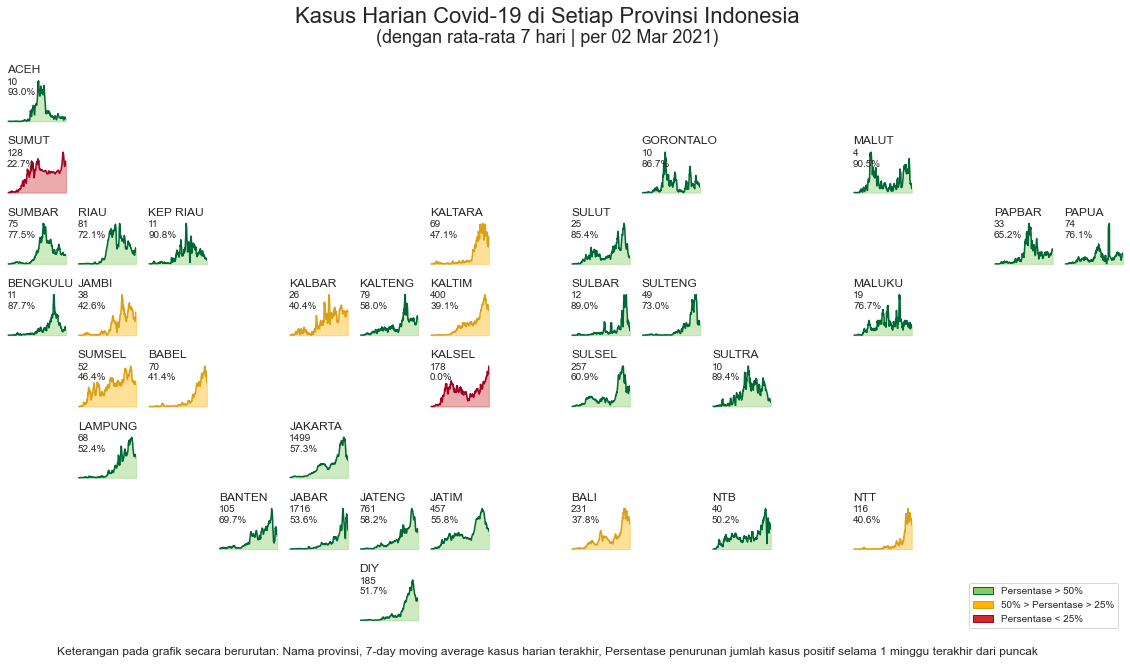

In [32]:
fig, axs = plt.subplots(8,16, figsize=(20,10))

for col in grid_loc.index: 
    data = kasus_harian.rolling(7).mean().loc[:, col]

    percentage = tl_res[tl_res.index==col].values[0][0]
    colorfill = fillcolors[tl_res.loc[col, 'cat']]
    color = linecolors[tl_res.loc[col, 'cat']]
    
    x = int(grid_loc.loc[col]['level_1'])
    y = int(grid_loc.loc[col]['level_0'])
    ax = axs[x,y]
    
    data.plot(ax=ax, c=color)
    ax.set_title(col.upper(), x=0, y=1, fontsize=12, loc='left')
    ax.set_xlabel("")
    l1 = ax.lines[0]
    x1 = l1.get_xydata()[:,0]
    y1 = l1.get_xydata()[:,1]
    ax.fill_between(x1, y1, alpha=0.4, color=colorfill)
    
    number = int(data[-1])
    ax.text(x=0,y=0.88,s=number, transform=ax.transAxes, fontsize=10)
    ax.text(x=0,y=0.64, s=str(percentage)+"%", transform=ax.transAxes, fontsize=10)

for row in axs:
    for ax in row:
        plt.subplots_adjust(hspace=0.6)
        ax.axis('off')
        
plt.suptitle("Kasus Harian Covid-19 di Setiap Provinsi Indonesia", fontsize=22)
plt.text(s="(dengan rata-rata 7 hari | per "+\
         max(stats.index).to_pydatetime().strftime("%d %b %Y")+")", x=0.5, y=.93, fontsize=18,
         ha='center', transform=fig.transFigure)
plt.text(s="Keterangan pada grafik secara berurutan: Nama provinsi, 7-day moving average kasus harian terakhir, \
Persentase penurunan jumlah kasus positif selama 1 minggu terakhir dari puncak",
         x=0.5, y=.08, fontsize=12,
         ha='center', transform=fig.transFigure)

legend_elements = [Patch(facecolor='#86cb66', edgecolor='#006837', label='Persentase > 50%'),
                   Patch(facecolor='#FFB300', edgecolor='#D9A01A', label='50% > Persentase > 25%'),
                   Patch(facecolor='#CF2B2E', edgecolor='#a50026', label='Persentase < 25%')]

# Create the figure
plt.legend(handles=legend_elements)

plt.show()

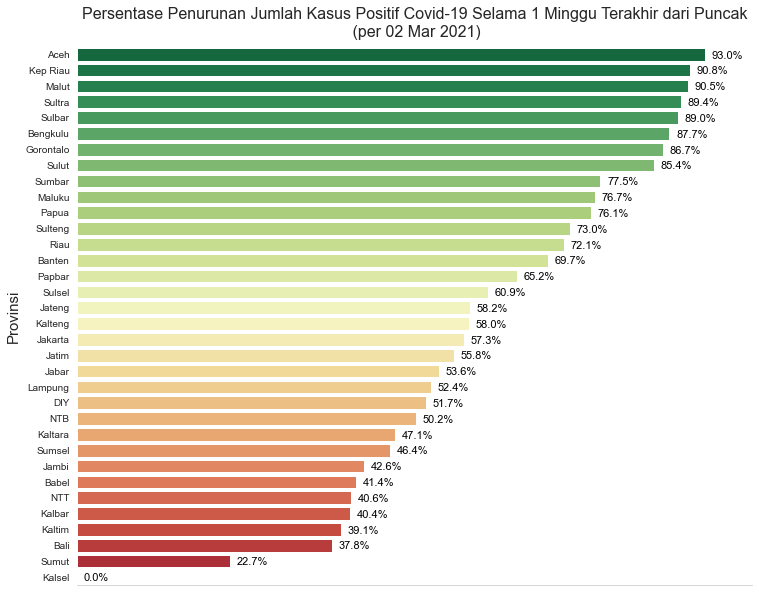

In [33]:
tl_res2 = tl_res.copy()
tl_res2.drop('?', inplace=True)
tl_res2.sort_values(by='prc', ascending=False, inplace=True)

ax = sns.catplot(y=tl_res2.index, x='prc', data=tl_res2, kind='bar', height=8,
                 aspect=1.3, palette='RdYlGn_r')

plt.xticks(np.arange(0,110,10))
plt.xticks([])
plt.xlabel('')
plt.ylabel('Provinsi', loc='center', fontsize=15)

for i, v in enumerate(tl_res2['prc']):
    plt.text(v + 1, i + .25, str(v)+"%", color='black', fontsize=11)

# plt.axhspan(33.3, 21.5, xmin=.3, xmax=.32, color='red', alpha=0.5)
# plt.annotate("  Provinsi berikut perlu diperhatikan", xy=(33, 27.8), xytext=(50, 28),
#              arrowprops=dict(arrowstyle="->", color='black'))

plt.grid(visible=False)    
sns.despine(left=True)
plt.title("Persentase Penurunan Jumlah Kasus Positif Covid-19 Selama 1 Minggu Terakhir dari Puncak\n (per "\
          +max(stats.index).to_pydatetime().strftime("%d %b %Y")+")",\
          fontsize=16, pad=10, loc='center')
    
plt.show()

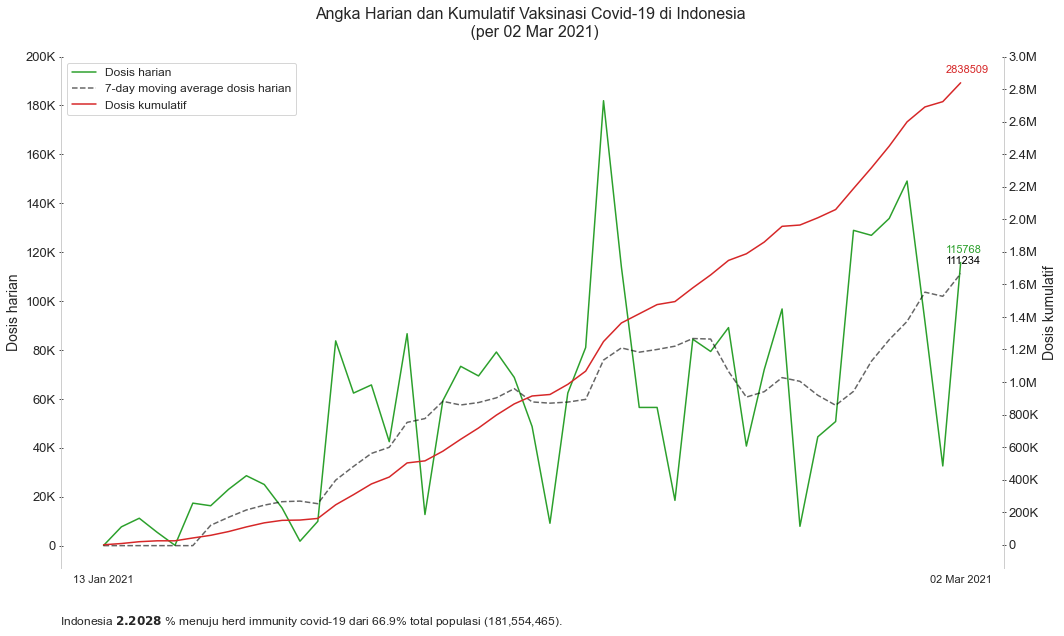

In [34]:
fig, ax1 = plt.subplots(figsize=(15,9))
color = ['tab:green', 'tab:red']

ax1 = sns.lineplot(x=vaccinated.index, y='Dosis harian', data=vaccinated, color=color[0],
                  label='Dosis harian', legend=None)
ax1 = sns.lineplot(x=vaccinated.index, y=dh_ma, data=vaccinated, color='black',
                  label='7-day moving average dosis harian', legend=None, linestyle='--', alpha=0.6)

ax2 = ax1.twinx()

ax2 = sns.lineplot(x=vaccinated.index, y='Dosis kumulatif', data = vaccinated, sort=False, color=color[1],
                  label='Dosis kumulatif', legend=None)

yticks = np.arange(0,np.ceil(max(vaccinated['Dosis harian']))+30000,20000)
yticklabels =[]

yticks2 = np.arange(0,np.ceil(max(vaccinated['Dosis kumulatif']))+300000,200000)
yticklabels2 =[]

for number in yticks:
    if number > 1000000:
        numbertext = str(int(number//1000000))+'.'+str(int((number%1000000)/100000))+"M"
        yticklabels2.append(numbertext)
    elif number > 1000:
        numbertext = str(int(number/1000))+"K"
        yticklabels.append(numbertext)
    else:
        numbertext = str(int(number))
        yticklabels.append(numbertext)

for number in yticks2:
    if number >= 1000000:
        numbertext = str(int(number//1000000))+'.'+str(int((number%1000000)/100000))+"M"
        yticklabels2.append(numbertext)
    elif number > 1000:
        numbertext = str(int(number/1000))+"K"
        yticklabels2.append(numbertext)
    else:
        numbertext = str(int(number))
        yticklabels2.append(numbertext)

        
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2

axs, spines = (ax1,ax2), ('top', 'bottom')

for ax in axs:
    ax.set_xticks([min(vaccinated.index), max(vaccinated.index)])
    ax.set_xticklabels([min(vaccinated.index).to_pydatetime().strftime("%d %b %Y"),
                         max(vaccinated.index).to_pydatetime().strftime("%d %b %Y")], fontsize=11)
    ax.tick_params(axis='y', direction='inout')
    ax.grid(False)
    
    if ax == ax1:
        ax.set_ylabel('Dosis harian', fontsize=14)
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticklabels, fontsize=13)
        ax.set_xlabel('')
        ax.annotate(vaccinated['Dosis harian'].values[-1],
             (vaccinated.index[-1],vaccinated['Dosis harian'].values[-1]), color=color[0],
             xytext=(-15, 10), textcoords='offset points', fontsize=11)
        ax.annotate(int(round(dh_ma.values[-1])),
             (vaccinated.index[-1],dh_ma.values[-1]),
             xytext=(-15, 10), textcoords='offset points', fontsize=11, color='black')
    else:
        ax.set_ylabel('Dosis kumulatif', fontsize=14)
        ax.set_yticks(yticks2)
        ax.set_yticklabels(yticklabels2, fontsize=13)
        ax.annotate(vaccinated['Dosis kumulatif'].values[-1],
                    (vaccinated.index[-1],vaccinated['Dosis kumulatif'].values[-1]), color=color[1],
                    xytext=(-15, 10), textcoords='offset points', fontsize=11)
        ax.legend(lines, labels, loc='upper left', fontsize=12)
    
    for spine in spines:
        ax.spines[spine].set_visible(False)

        
# plt.annotate("Indonesia " +r"$\bf{" + str(mhi) + "}$"+' % \nmenuju herd immunity\ncovid-19 dari 66.9% \n\
# total populasi (181,554,465).',\
#              (vaccinated.index[0],(np.ceil(max(vaccinated['Dosis kumulatif']))+300000)/2),
#              xytext=(0,0), textcoords='offset points', fontsize=11)

plt.text(s="Indonesia " +r"$\bf{" + str(mhi) + "}$"+' % menuju herd immunity covid-19 dari 66.9% total populasi (181,554,465).',
         x=0.30, y=0.03, fontsize=12, ha='center', transform=fig.transFigure)

plt.title("Angka Harian dan Kumulatif Vaksinasi Covid-19 di Indonesia \n (per "+\
          max(stats.index).to_pydatetime().strftime("%d %b %Y")+")",
          fontsize=16, pad=20, loc='center')

# peak_dosis = vaccinated[vaccinated['Dosis harian'] == max(vaccinated['Dosis harian'])].index
# plt.axvline(peak_dosis,
#            linestyle='--', color='black')
# plt.text(x=peak_dosis, y=-95000, s=peak_dosis[0].to_pydatetime().strftime("%d %b %Y"), fontsize=11,
#         ha='center', va='top', color='red')

fig.tight_layout()
plt.show()

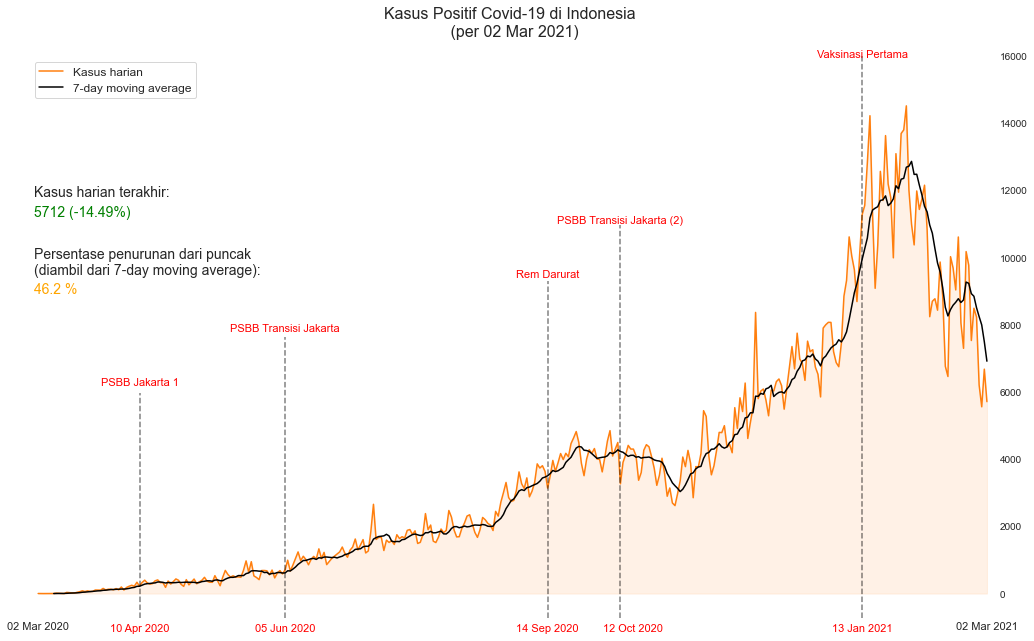

In [35]:
fig, ax = plt.subplots(figsize=(15,9))
color = 'tab:orange'

ax = sns.lineplot(x=stats.index, y='Kasus harian', data = stats, color=color,\
                  label='Kasus harian', legend=None)
ax = sns.lineplot(x=stats.index, y=khr, data=stats, color='black',\
                 label='7-day moving average', legend=None)

l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax.fill_between(x1, y1, alpha=0.1, color=color)
ax.yaxis.tick_right()

yticks = np.arange(0,int(np.ceil(max(kh.dropna())))+2000,2000)
ax.set_yticks(yticks)
ax.set_xticks([min(stats.index), max(stats.index)])
ax.set_xticklabels([min(stats.index).to_pydatetime().strftime("%d %b %Y"),\
                     max(stats.index).to_pydatetime().strftime("%d %b %Y")], fontsize=11)

spines = ['top', 'right', 'bottom', 'left']
for spine in spines:
    ax.spines[spine].set_visible(False)

ax.margins(x=0.01)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(length=0)
ax.grid(False)
    
perc = round((kh[-1]-kh[-2])/kh[-2]*100,2)
maxcasez = max(khr.dropna())
latestz = khr[-1]
prcz = round((maxcasez-latestz)/maxcasez*100,1)

colorz, colorzz = '', ''
if perc > 0:
    colorz = 'red'
elif perc == 0:
    colorz = 'orange'
else:
    colorz = 'green'

if prcz > 50:
    colorzz = 'green'
elif prcz > 25:
    colorzz = 'orange'
elif prcz < 25:
    colorzz = 'red'

# https://www.kompas.com/tren/read/2020/12/07/190200765/diperpanjang-lagi-berikut-perjalanan-psbb-di-jakarta?page=all
psbb_ppkm_text = ['PSBB Jakarta 1', 'PSBB Transisi Jakarta', 'Rem Darurat', 'PSBB Transisi Jakarta (2)',
                 'Vaksinasi Pertama']
psbb_ppkm_dates = ['2020-04-10', '2020-06-05', '2020-09-14', '2020-10-12', '2021-01-13']

ymax, y = 0.4, 6400
for i, date in enumerate(psbb_ppkm_dates):
    occurence = pr[pr.index == date].index[0]
    
    if not occurence.to_pydatetime() == datetime(2020,10,12):
        plt.text(x=occurence, y=-900, s=occurence.to_pydatetime().strftime("%d %b %Y"), fontsize=11,
                ha='center', va='top', color='red')
    else:
        day = occurence.to_pydatetime().day + 5
        occurence_temp = datetime(occurence.to_pydatetime().year, occurence.to_pydatetime().month, day)
        plt.text(x=occurence_temp, y=-900, s=occurence.to_pydatetime().strftime("%d %b %Y"), fontsize=11,
                ha='center', va='top', color='red')
    
    if not ymax >= 0.79:
        plt.axvline(occurence, ymax=ymax, linestyle='--', color='black', alpha=0.5)
        plt.text(x=occurence, y=y-250, s=psbb_ppkm_text[i], fontsize=11, ha='center', va='bottom', color='red')
        ymax += 0.1
        y = ymax*16000
    else:
        plt.axvline(occurence, linestyle='--', color='black', alpha=0.5)
        plt.text(x=occurence, y=15900, s=psbb_ppkm_text[i], fontsize=11, ha='center', va='bottom', color='red')
    


plt.title("Kasus Positif Covid-19 di Indonesia \n (per "+max(stats.index).to_pydatetime().strftime("%d %b %Y")+")",\
          fontsize=16, pad=20, loc='center')    
plt.text(s="Kasus harian terakhir:", x=0.07, y=0.69, fontsize=14, ha='left', transform=fig.transFigure)
plt.text(s=str(kh[-1])+" "+"("+str(perc)+"%)", x=0.07, y=0.66, fontsize=14, ha='left', transform=fig.transFigure,color=colorz)
plt.text(s="Persentase penurunan dari puncak\n(diambil dari 7-day moving average):",\
         x=0.07, y=0.57, fontsize=14, ha='left', transform=fig.transFigure)
plt.text(s=str(prcz)+" %", x=0.07, y=0.54, fontsize=14, ha='left', transform=fig.transFigure,color=colorzz)


plt.legend(fontsize=12)
fig.tight_layout()
plt.show()

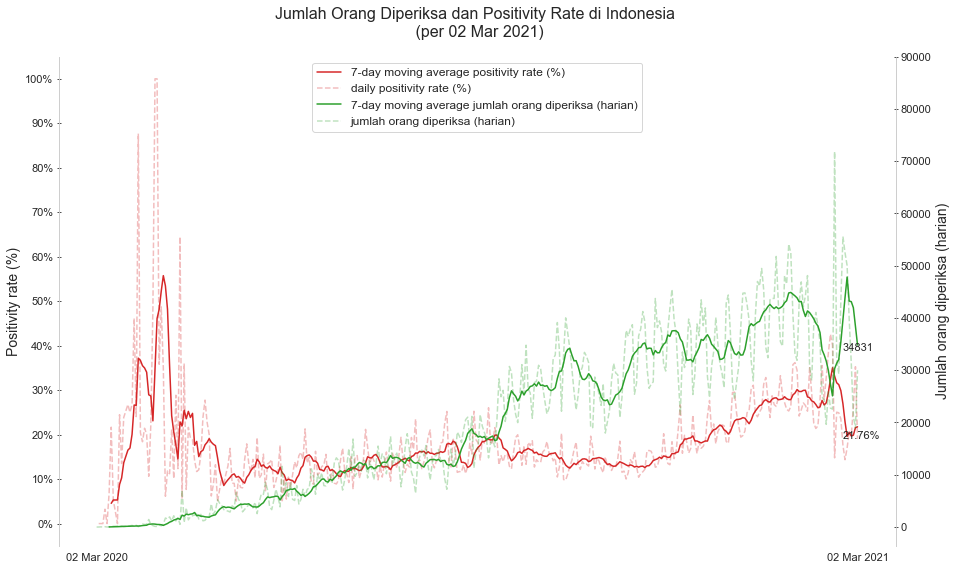

In [36]:
fig, ax1 = plt.subplots(figsize=(15,9))
color = ('tab:red', 'tab:green')

ax1 = sns.lineplot(x=pr.index, y=prra, data = pr, color=color[0],
                  label='7-day moving average positivity rate (%)', legend=None)
ax1 = sns.lineplot(x=pr.index, y=pr.values, data=pr, linestyle='--', alpha=0.3, color=color[0],
                  label='daily positivity rate (%)', legend=None)

ax2 = ax1.twinx()

ax2 = sns.lineplot(x=jodh.index, y=jodhra, data = jodh, sort=False, color=color[1],
                  label='7-day moving average jumlah orang diperiksa (harian)', legend=None)
ax2 = sns.lineplot(x=jodh.index, y=jodh.values, data=jodh, linestyle='--', alpha=0.3, color=color[1],
                  label='jumlah orang diperiksa (harian)', legend=None)

yticks = np.arange(0,101,10)
yticks2 = np.arange(0,int(np.ceil(max(jodhra.dropna())))*2,10000) 

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2

axs, spines = (ax1,ax2), ('top', 'bottom')

for ax in axs:
    ax.set_xticks([min(jodh.index), max(jodh.index)])
    ax.set_xticklabels([min(jodh.index).to_pydatetime().strftime("%d %b %Y"),
                         max(jodh.index).to_pydatetime().strftime("%d %b %Y")], fontsize=11)
    ax.set_xlabel('')
    ax.tick_params(axis='y', direction='inout')
    
    if ax == ax1:
        ax.set_yticks(yticks)
        ax.annotate(str(round(prra.values[-1],2))+"%", (prra.index[-1],prra.values[-1]-5),
             xytext=(-15, 10), textcoords='offset points', fontsize=11)
        ax.set_yticklabels([str(ytick)+"%" for ytick in yticks], fontsize=11)
        ax.grid(False)
        ax.set_ylabel('Positivity rate (%)', fontsize=14)
    else:
        ax.set_yticks(yticks2)
        ax.annotate(str(int(round(jodhra.values[-1],0))), (jodh.index[-1],jodhra.values[-1]-3000),
             xytext=(-15, 10), textcoords='offset points', fontsize=11)
        ax.set_yticklabels(yticks2,fontsize=11)
        ax.set_ylabel('Jumlah orang diperiksa (harian)', fontsize=14)
        ax.legend(lines, labels, loc='upper center', fontsize=12)
        
    for spine in spines:        
        ax.spines[spine].set_visible(False)

        
plt.title("Jumlah Orang Diperiksa dan Positivity Rate di Indonesia \n (per "+
          max(stats.index).to_pydatetime().strftime("%d %b %Y")+")",
          fontsize=16, pad=20, loc='center')

plt.grid(False)
plt.show()

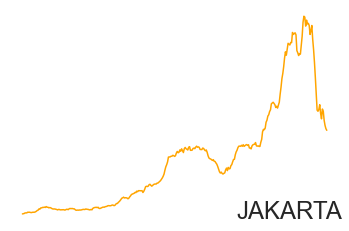

In [37]:
plt.plot(kasus_harian.index,kasus_harian['Jakarta'].rolling(7).mean(), c='orange')
plt.axis('off')
plt.title('Jakarta'.upper(),x=1,y=0,fontsize=24,loc='right')
plt.show()